In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from download_climate_data import download_data
import os
import datetime

We are only interested in sensors with the following parameters: (sensor_name = sds011, sensor_id = 6127) and (sensor_name = bme280, sensor_id = 6128).

In [197]:
def part_day(x):
    """ Returns part of day based on the timestamp hour """
    x = x.hour
    if (x > 4) and (x <= 8):
        return 1
    elif (x > 8) and (x <= 12):
        return 2
    elif (x > 12) and (x <= 14):
        return 3
    elif (x > 14) and (x <= 18):
        return 4
    elif (x > 18) and (x <= 22):
        return 5
    else:
        return 6

In [198]:
def season(x):
    """Returns season based on month"""
    x = x.month
    if (x > 3) and (x <= 6):
        return 1
    elif (x > 6) and (x <= 9):
        return 2
    elif (x > 9) and (x <= 11):
        return 3
    else:
        return 4

In [212]:
def is_workday(x):
    """ Returns if day is workday"""
    if x <= 4:
        return 1
    else:
        return 0

In [232]:
def mean_print_plot(df, category: str, data_col1: str, data_col2: str) -> None:
    """Function which prints the mean of each category in a data column and plots the difference between the 2 datasets
    
    Parameters: 
    df: data frame
    category: category name
    data_col1: data to calculate mean on
    data_col2: data to calculate mean on
    
    Returns: 
    None
    
    """
    
    print(f"P1 data stats: {df.groupby([category]).mean()[data_col1].sort_index()}")
    print('------------------------------------------------')
    print(f"P2 data stats: {df.groupby([category]).mean()[data_col2].sort_index()}")
    
    plt.plot(df.groupby([category]).mean()[data_col1].sort_index(), label='P1')
    plt.plot(df.groupby([category]).mean()[data_col2].sort_index(), label='P2')
    plt.title(f'Mean of {data_col1} and {data_col2} per {category} category')
    plt.legend()
    plt.grid()

In [291]:
def is_p1_high(x):
    if x > 35:
        return 1
    else:
        return 0

In [200]:
def is_holiday(x):
    """ Returns if it is holiday if date is 3 days around a holiday"""
    for holiday in HOLIDAYS:
        if (x >= holiday-datetime.timedelta(days=3)) and (x <= holiday+datetime.timedelta(days=3)):
            return 1
        else:
            return 0

Also, we are going to create a list with all public holidays:  
Date	Holiday	Official Name  
1 January	New Year's Day   
3 March	Liberation Day  
1 May	International Workers' Day  
6 May	Saint George's Day  
24 May	Bulgarian Education and Culture and Slavonic Literature Day  
6 September	Unification Day  
22 September	Independence Day  
24 December	Christmas Eve  
25 & 26 December	Christmas Day  
Moveable	Orthodox Good Friday, Holy Saturday & Easter  

In [220]:
HOLIDAYS = [datetime.date(2020,4,19), datetime.date(2021,1,1), datetime.date(2021,3,3),datetime.date(2020,5,1),
            datetime.date(2020,5,6),datetime.date(2020,5,24),datetime.date(2020,9,6),
            datetime.date(2020,9,22),datetime.date(2020,12,24),datetime.date(2020,12,25),datetime.date(2020,12,26)]

In [7]:
START_DATE = datetime.date(2020,4,1)   # start time for the analysis

### Data download now

In [13]:
download_data(sensor_name='sds011', sensor_id=6127)
download_data(sensor_name='bme280', sensor_id=6128)

Downloading: 2020-04-01
Downloading: 2020-04-02
Downloading: 2020-04-03
Downloading: 2020-04-04
Downloading: 2020-04-05
Downloading: 2020-04-06
Downloading: 2020-04-07
Downloading: 2020-04-08
Downloading: 2020-04-09
Downloading: 2020-04-10
Downloading: 2020-04-11
Downloading: 2020-04-12
Downloading: 2020-04-13
Downloading: 2020-04-14
Downloading: 2020-04-15
Downloading: 2020-04-16
Downloading: 2020-04-17
Downloading: 2020-04-18
Downloading: 2020-04-19
Downloading: 2020-04-20
Downloading: 2020-04-21
Downloading: 2020-04-22
Downloading: 2020-04-23
Downloading: 2020-04-24
Downloading: 2020-04-25
Downloading: 2020-04-26
Downloading: 2020-04-27
Downloading: 2020-04-28
Downloading: 2020-04-29
Downloading: 2020-04-30
Downloading: 2020-05-01
Downloading: 2020-05-02
Downloading: 2020-05-03
Downloading: 2020-05-04
Downloading: 2020-05-05
Downloading: 2020-05-06
Downloading: 2020-05-07
Downloading: 2020-05-08
Downloading: 2020-05-09
Downloading: 2020-05-10
Downloading: 2020-05-11
Downloading: 202

Downloading: 2020-04-02
Downloading: 2020-04-03
Downloading: 2020-04-04
Downloading: 2020-04-05
Downloading: 2020-04-06
Downloading: 2020-04-07
Downloading: 2020-04-08
Downloading: 2020-04-09
Downloading: 2020-04-10
Downloading: 2020-04-11
Downloading: 2020-04-12
Downloading: 2020-04-13
Downloading: 2020-04-14
Downloading: 2020-04-15
Downloading: 2020-04-16
Downloading: 2020-04-17
Downloading: 2020-04-18
Downloading: 2020-04-19
Downloading: 2020-04-20
Downloading: 2020-04-21
Downloading: 2020-04-22
Downloading: 2020-04-23
Downloading: 2020-04-24
Downloading: 2020-04-25
Downloading: 2020-04-26
Downloading: 2020-04-27
Downloading: 2020-04-28
Downloading: 2020-04-29
Downloading: 2020-04-30
Downloading: 2020-05-01
Downloading: 2020-05-02
Downloading: 2020-05-03
Downloading: 2020-05-04
Downloading: 2020-05-05
Downloading: 2020-05-06
Downloading: 2020-05-07
Downloading: 2020-05-08
Downloading: 2020-05-09
Downloading: 2020-05-10
Downloading: 2020-05-11
Downloading: 2020-05-12
Downloading: 202

Downloading: 2021-03-10
Downloading: 2021-03-11
Downloading: 2021-03-12
Downloading: 2021-03-13
Downloading: 2021-03-14
Downloading: 2021-03-15
Downloading: 2021-03-16
Downloading: 2021-03-17
Downloading: 2021-03-18
Downloading: 2021-03-19
Downloading: 2021-03-20
Downloading: 2021-03-21
Downloading: 2021-03-22
Downloading: 2021-03-23
Downloading: 2021-03-24
Downloading: 2021-03-25
Downloading: 2021-03-26
Downloading: 2021-03-27
Downloading: 2021-03-28
Downloading: 2021-03-29
Downloading: 2021-03-30
Downloading: 2021-03-31
Downloading: 2021-04-01
Downloading: 2021-04-02
Downloading: 2021-04-03
Downloading: 2021-04-04
Downloading: 2021-04-05
Downloading: 2021-04-06
Downloading: 2021-04-07
Downloading: 2021-04-08
Downloading: 2021-04-09
Downloading: 2021-04-10
Downloading: 2021-04-11
Downloading: 2021-04-12
Downloading: 2021-04-13
Downloading: 2021-04-14
Downloading: 2021-04-15
Downloading: 2021-04-16


#### We have all the data, let us now load the data in dataframe

In [17]:
file_list = os.listdir('./data/')

In [19]:
date_list = set([file.split('_')[0] for file in file_list]) # get unique dates

In [21]:
df = pd.DataFrame()

In [107]:
for date in date_list:
    for file in file_list:
        if file.find(date) != -1:
            if file.find('bme280') != -1:
                df_temp_1 = pd.read_csv('./data/'+file, sep=';')
                df_temp_1.timestamp = pd.to_datetime(df_temp_1.timestamp, errors='ignore', infer_datetime_format=True)
            elif file.find('sds011') != -1:
                df_temp_2 = pd.read_csv('./data/'+file, sep=';')
                df_temp_2.timestamp = pd.to_datetime(df_temp_2.timestamp, errors='ignore', infer_datetime_format=True)
            
        df_1 = pd.merge_asof(df_temp_1, df_temp_2, on='timestamp', direction='nearest', tolerance=datetime.timedelta(seconds=20), allow_exact_matches=False)
        df_1.drop(['altitude', 'pressure', 'durP2', 'ratioP2', 'durP1', 'ratioP1', "ratioP2",
                  'sensor_id_x', 'sensor_type_x', 'location_x', 'lat_x', 'lon_x', 'pressure_sealevel',
                  'sensor_id_y', 'sensor_type_y', 'location_y', 'lat_y','lon_y'], axis=1, inplace=True);
        df_1.dropna(inplace=True)
    df = pd.concat([df, df_1])

In [180]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [224]:
df['IsHoliday'] = df['timestamp'].apply(is_holiday) 
df['PartDay'] = df['timestamp'].apply(part_day)

In [208]:
df['WeekDay'] = df['timestamp'].dt.dayofweek

In [213]:
df['IsWorking'] = df['WeekDay'].apply(is_workday)

In [217]:
df['Season'] = df['timestamp'].apply(season)

Check if the P1 and P2 values are higher in any part of the day or if it is a holiday.

P1 data stats: IsHoliday
0    22.140972
1    11.290025
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: IsHoliday
0    11.068588
1     6.689738
Name: P2, dtype: float64


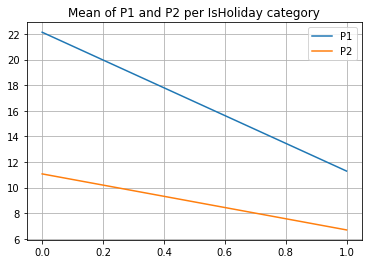

In [233]:
mean_print_plot(df, category='IsHoliday', data_col1='P1', data_col2='P2')

P1 data stats: WeekDay
0    20.923175
1    21.798023
2    22.379729
3    19.217035
4    24.584643
5    24.521887
6    20.408726
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: WeekDay
0    10.808763
1    10.862912
2    10.874274
3     9.698477
4    12.087680
5    12.027748
6    10.652785
Name: P2, dtype: float64


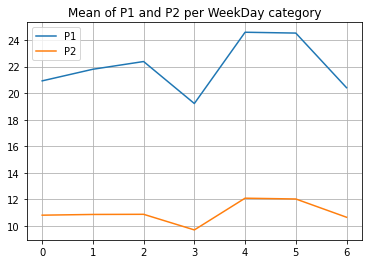

In [236]:
mean_print_plot(df, category='WeekDay', data_col1='P1', data_col2='P2')

P1 data stats: PartDay
1    26.982850
2    18.058295
3    16.040996
4    24.726342
5    23.737789
6    19.952869
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: PartDay
1    13.078755
2     9.806793
3     8.683181
4    12.124245
5    11.635798
6     9.897735
Name: P2, dtype: float64


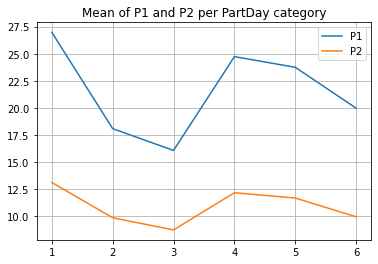

In [237]:
mean_print_plot(df, category='PartDay', data_col1='P1', data_col2='P2')

P1 data stats: Season
1    14.863447
2    10.960895
3    30.822060
4    33.120027
Name: P1, dtype: float64
------------------------------------------------
P2 data stats: Season
1     7.860538
2     7.603711
3    14.641096
4    14.769914
Name: P2, dtype: float64


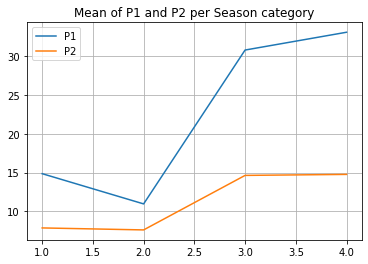

In [238]:
mean_print_plot(df, category='Season', data_col1='P1', data_col2='P2')

### As we see there are correlations between the season, week day, time of day and holidays and the air quality. 
##### I will now check with a seaborn correlation plot

<AxesSubplot:>

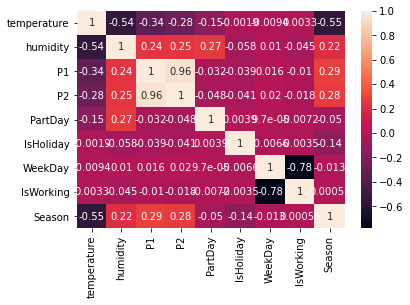

In [240]:
sns.heatmap(df.corr(), annot=True)

Strangly enough there seems to be a correlation also between the humidity and the air quality, but not that much with temperature.

### Regression
##### I think that this problem may be best generalized with a random forest model. First I will start with a regressor, then I will use a classifier

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [333]:
X = df[['temperature', 'humidity', 'IsHoliday', 'WeekDay', 'Season']]
y = df['P1']

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
sc_regr = StandardScaler()
X_train = sc_regr.fit_transform(sc_regr)
X_test = sc_regr.transform(sc_regr)

In [335]:
regr = RandomForestRegressor()
regr_svm = SVR()

In [336]:
regr.fit(X_train, y_train)
regr_svm.fit(X_train, y_train)

SVR()

In [339]:
regr.predict([today])

array([14.71371667])

In [340]:
regr_svm.predict([today])

array([24.00271396])

In [342]:
y_pred_svm = regr_svm.predict(X_test)

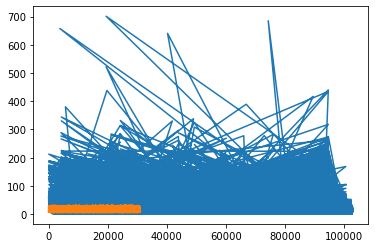

In [349]:
plt.plot(y_test)
plt.plot(y_pred_svm)

In [292]:
df['HighP1'] = df['P1'].apply(is_p1_high)

### Now I will run a classification RF model

In [274]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
y = df['HighP1']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [295]:
classifier = RandomForestClassifier()

In [296]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [297]:
y_pred = classifier.predict(X_test)

In [298]:
print(accuracy_score(y_test, y_pred))

0.8860242914979757


In [301]:
print(confusion_matrix(y_test,y_pred))

[[24205  1458]
 [ 2061  3151]]


In [299]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     25663
           1       0.68      0.60      0.64      5212

    accuracy                           0.89     30875
   macro avg       0.80      0.77      0.79     30875
weighted avg       0.88      0.89      0.88     30875



In [307]:
today = [1, 100, 0, 6, 1]
classifier.predict_proba([today])
regr.predict([today])

array([16.3107])

In [310]:
regr.feature_importances_

array([0.58098859, 0.21763928, 0.00060336, 0.13613931, 0.06462947])

In [311]:
classifier.feature_importances_

array([0.56722672, 0.24078604, 0.0011193 , 0.08231988, 0.10854807])

Results are not great - this may be due to overfitting of the clean air data as we have roughly 5 times more data for that case

In [331]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [320]:
sc = StandardScaler()

In [329]:
classifier_svc = SVC()

In [321]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [345]:
classifier_svc.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [346]:
y_pred_svc = classifier_svc.predict(X_test)

AttributeError: 'SVC' object has no attribute 'shape_fit_'

In [ ]:
print(classification_report(y_test, y_pred_svc))

In [ ]:
classifier_svc.predict([today])